# Mapas Auto-organizados

Tambien llamados Self-Organizing Maps o SOM por sus siglas en inglés, son una técnica de aprendizaje no supervisado. Fueron desarrollados por Teuvo Kohonen en la década de los 80 por lo que en ocasiones les llaman Mapas Auto-organizados de Kohonen. Son una herramienta poderosa para descubrir patrones y estructuras en conjuntos de datos de alta dimensión utilizada en la minería de datos y la visualización de datos.

Los SOM son una forma de redes neuronales artificiales que se utilizan para mapear datos de alta dimensión en una estructura de baja dimensión, generalmente un plano bidimensional o un arreglo tridimensional.Preservando la topología y las relaciones entre los datos originales durante el proceso de mapeo.

Constan de una capa de entrada y una capa de nodos o neuronas organizadas en una estructura bidimensional o tridimensional. Cada nodo en el SOM tiene un vector de pesos asociado que representa un punto en el espacio de características.

![diagrama de SOM](https://editor.analyticsvidhya.com/uploads/31202xy.JPG)

Durante el entrenamiento, se selecciona un ejemplo de datos aleatoriamente y se busca la neurona en el SOM cuyo vector de peso sea más similar al ejemplo de datos. La neurona ganadora, también llamada "unidad de mapeo ganadora", se ajusta para que sus pesos se acerquen más al ejemplo de datos. Las neuronas vecinas a la ganadora también se ajustan, pero en menor medida.

Los SOM utilizan una función de vecindad que define qué neuronas se ajustan durante el proceso de entrenamiento. Las neuronas cercanas a la ganadora se ajustan más, mientras que las lejanas se ajustan menos. La topología del SOM puede ser rectangular, hexagonal u otras formas, y puede ser seleccionada según las características de los datos y los objetivos del análisis.

La actualización de los pesos en las neuronas viene dado por la siguiente fomula

$$\Delta W_{ij} = \alpha(t) \cdot h_{ij}(t) \cdot (X - W_{ij}(t))$$


La fórmula de actualización de pesos en los Mapas Autoorganizados (SOM) se puede expresar en LaTeX de la siguiente manera:


Donde:

- $\Delta W_{ij}$ es el cambio en el peso del enlace entre la neurona $i$ y la entrada $j$.
- $\alpha(t)$ es la tasa de aprendizaje en el tiempo $t$.
- $h_{ij}(t)$ es la función de vecindad que describe la influencia de la neurona $i,j$ en la actualización.
- $X$ es el vector de entrada (ejemplo de datos).
- $W_{ij}(t)$ es el vector de peso de la neurona $i,j$ en el tiempo $t$.

La función de vecindad $h_{ij}(t)$ y la tasa de aprendizaje $\alpha(t)$ se definen específicamente en función de la topología y la evolución del entrenamiento del SOM, por lo que los detalles precisos pueden variar según la implementación.

Después de entrenar un SOM, se pueden usar diferentes técnicas para visualizar los resultados. Una de las más comunes es asignar colores o etiquetas a las neuronas en función de las características de los datos que representan. Los SOM se utilizan para agrupar datos similares en regiones cercanas en el mapa, lo que facilita la detección de patrones, la visualización de estructuras y la segmentación de datos.

Los SOM se utilizan en una amplia gama de aplicaciones, como análisis de datos, minería de datos, reconocimiento de patrones, compresión de datos, segmentación de imágenes, entre otros. Son especialmente útiles cuando se trabaja con grandes conjuntos de datos multidimensionales, ya que pueden simplificar la interpretación de los datos.


## Ejemplo con implementación básica

Ahora veremos un a implementación de SOM para ver como progresa su entrenamiento.

In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

Generamos y visualizamos un conjunto pequeño de datos

In [2]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=50)

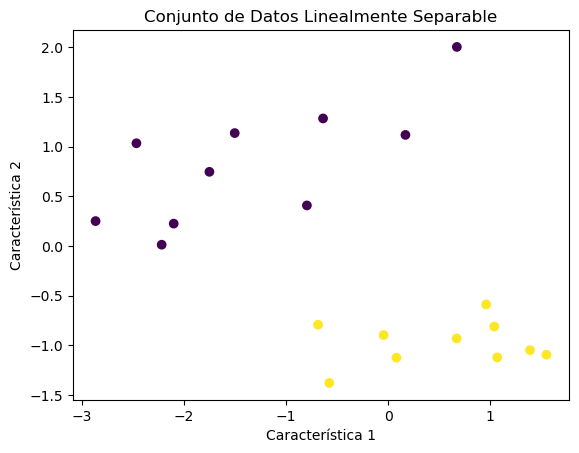

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Datos Linealmente Separable')
plt.show()

Implementación del SOM

In [5]:
class SOM():
    def __init__(self, tamanio_entrada, tamanio_mapa):
        # mapa de una dimensión
        self.neuronas = np.array(
            [Neurona(tamanio_entrada,i) for i in range(tamanio_mapa)]
        )
        self.tamanio_mapa = tamanio_mapa

    def compila(self, fun_tasa_aprendizaje, fun_vecindad):
        for neurona in self.neuronas:
            neurona.compila(fun_tasa_aprendizaje, fun_vecindad)

    def entrena(self, datos, num_epochs):
        historia = [self.pesos()]
        datos2 = datos.copy()
        for epoch in range(num_epochs):
            print(f"Epoch {epoch}")
            np.random.shuffle(datos2)  ## revoler datos de manera aleatoria
            for dato in datos2:
                print(f"\tDato {dato}")
                neurona_ganadora = self.encuentra_neurona_cercana(dato)
                for neurona in self.neuronas:
                    neurona.actualiza_pesos(dato,neurona_ganadora, epoch)
            historia.append(self.pesos())
        return np.array(historia)

    def encuentra_neurona_cercana(self, dato):
        distancias = np.linalg.norm(self.pesos() - dato, axis=1)
        min_index = np.argmin(distancias)
        print(f"\tNeurona mas cercana {min_index}")
        return self.neuronas[min_index]

    def pesos(self):
        return np.array([neurona.pesos for neurona in self.neuronas])

class Neurona:
    def __init__(self, tamanio_entrada, id):
        self.pesos = np.random.rand(tamanio_entrada)
        self.id = id

    def compila(self, fun_tasa_aprendizaje, fun_vecindad):
        self.tasa_aprendizaje = fun_tasa_aprendizaje
        self.vecindad = fun_vecindad

    def actualiza_pesos(self,dato,neurona_ganadora, epoch):
        t_a = self.tasa_aprendizaje(epoch)
        ve = self.vecindad(neurona_ganadora.id,self.id,epoch)
        self.pesos += t_a * ve * (dato - self.pesos)
        print(f"\t\tNeurona {self.id}")
        print(f"\t\t\tTasa de aprendizaje {t_a} vecindad {ve} diferencia {(dato - self.pesos)}")
        print(f"\t\t\tNuevos pesos para neurona  {self.pesos}")


def fun_tasa_aprendizaje(tasa_aprendizaje_inical,velocidad_disminucion_tasa):
    def tasa_aprendizaje(epoch):
        return tasa_aprendizaje_inical * np.exp(-epoch / velocidad_disminucion_tasa)  # función exponencial
    return tasa_aprendizaje


def fun_vecindad(radio_influencia):
    def vecindad(vector_A,vector_B,epoch):
        return np.exp(-np.linalg.norm(vector_A - vector_B) **2 / (2 * radio_influencia(epoch)**2))
    return vecindad


def fun_radio_influencia(radio_inicial, tasa_decaimiento):
    def radio_influencia(epoch):
        return radio_inicial * np.exp(-epoch * tasa_decaimiento)
    return radio_influencia

Definimos las funciones de vecindad y tasa de aprendizaje. Tambien podemos visualizar como decaen.

In [6]:
tasa_aprendizaje = fun_tasa_aprendizaje(1,3)
radio_influencia = fun_radio_influencia(2, 1)
vecindad = fun_vecindad(radio_influencia)

Text(0.5, 0, 'Epoch')

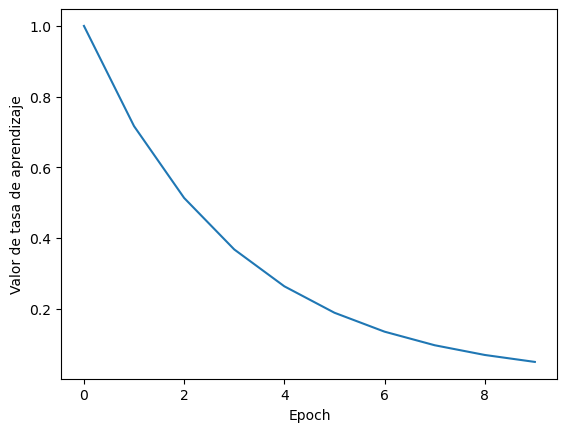

In [7]:
tasas_aprendizaje = [tasa_aprendizaje(e) for e in range(10)]
#plt.semilogy(tasas_aprendizaje)
plt.plot(tasas_aprendizaje)
plt.ylabel('Valor de tasa de aprendizaje')
plt.xlabel('Epoch')

Text(0.5, 0, 'Distancia entre neuronas')

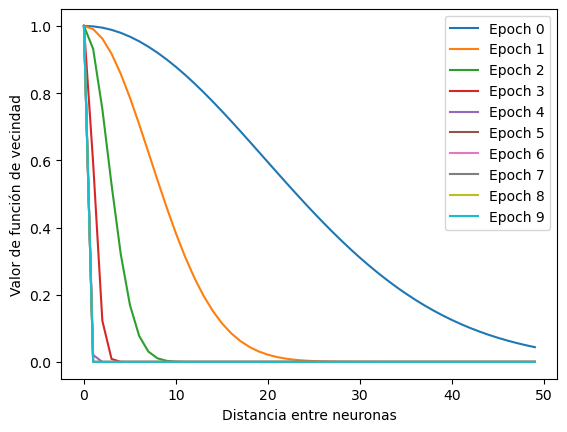

In [8]:
for e in range(10):
    plt.plot([vecindad(np.zeros(2),np.array([0,1])*r,e) for r in np.linspace(0, 5, 50)], label=f"Epoch {e}")

plt.legend()

plt.ylabel('Valor de función de vecindad')
plt.xlabel('Distancia entre neuronas')

Definimos la topologia del SOM sus funciones y entrenamos

In [9]:
som = SOM(2,2)
som.compila(tasa_aprendizaje,vecindad)

In [10]:
historia = som.entrena(X,10)

Epoch 0
	Dato [ 1.39110738 -1.04943459]
	Neurona mas cercana 0
		Neurona 0
			Tasa de aprendizaje 1.0 vecindad 1.0 diferencia [0.00000000e+00 2.22044605e-16]
			Nuevos pesos para neurona  [ 1.39110738 -1.04943459]
		Neurona 1
			Tasa de aprendizaje 1.0 vecindad 0.8824969025845955 diferencia [ 0.14247253 -0.21540799]
			Nuevos pesos para neurona  [ 1.24863486 -0.83402661]
	Dato [-1.50408599  1.13786267]
	Neurona mas cercana 1
		Neurona 0
			Tasa de aprendizaje 1.0 vecindad 0.8824969025845955 diferencia [-0.34019419  0.2570142 ]
			Nuevos pesos para neurona  [-1.1638918   0.88084847]
		Neurona 1
			Tasa de aprendizaje 1.0 vecindad 1.0 diferencia [0. 0.]
			Nuevos pesos para neurona  [-1.50408599  1.13786267]
	Dato [-0.63812215  1.28515091]
	Neurona mas cercana 0
		Neurona 0
			Tasa de aprendizaje 1.0 vecindad 1.0 diferencia [0. 0.]
			Nuevos pesos para neurona  [-0.63812215  1.28515091]
		Neurona 1
			Tasa de aprendizaje 1.0 vecindad 0.8824969025845955 diferencia [0.10175343 0.01730682]


Visualizamos la historia de los pesos y como se van actualizando

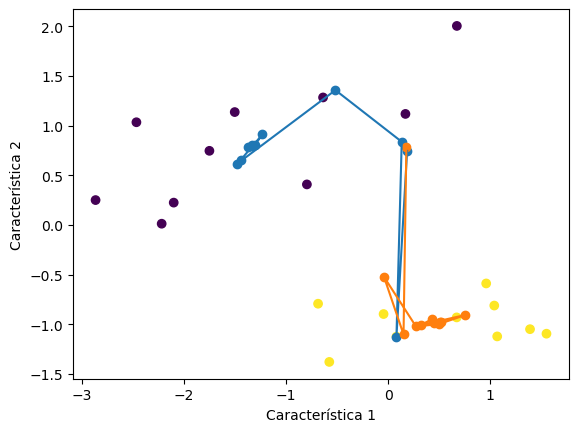

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

plt.plot(historia[:,0,0],historia[:,0,1])
plt.scatter(historia[:,0,0],historia[:,0,1])

plt.plot(historia[:,1,0],historia[:,1,1])
plt.scatter(historia[:,1,0],historia[:,1,1])

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
#plt.title('Conjunto de Datos Linealmente Separable')
plt.show()

# Implementaciones de librerias

Mostraremos la libreria [MiniSom](https://github.com/JustGlowing/minisom), una de las mas populares para entrenar y visualizar SOMs


Comenzamos instalando y cargando las librerias necesarias

In [12]:
! pip install minisom

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=780879747f2cf87de4980f8f37346d59ea37976b39ee39a28181d3a59387ea8a
  Stored in directory: /home/kincaid/.cache/pip/wheels/28/e3/3d/707f393fa9013d5ab7b3ffb914ded8ca3c40dec231fa392528
Successfully built minisom


In [13]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.gridspec as gridspec


Cargamos los datos de Wine los cuales tienen información de varios vinos.

Tambien preprocesamos los datos.

In [14]:
data = load_wine()

In [15]:
X1 = data.data

In [16]:
X = (X1 - np.mean(X1, axis=0)) / np.std(X1, axis=0)

visualizamos la interacción entre variables

In [17]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["clase"] = data.target

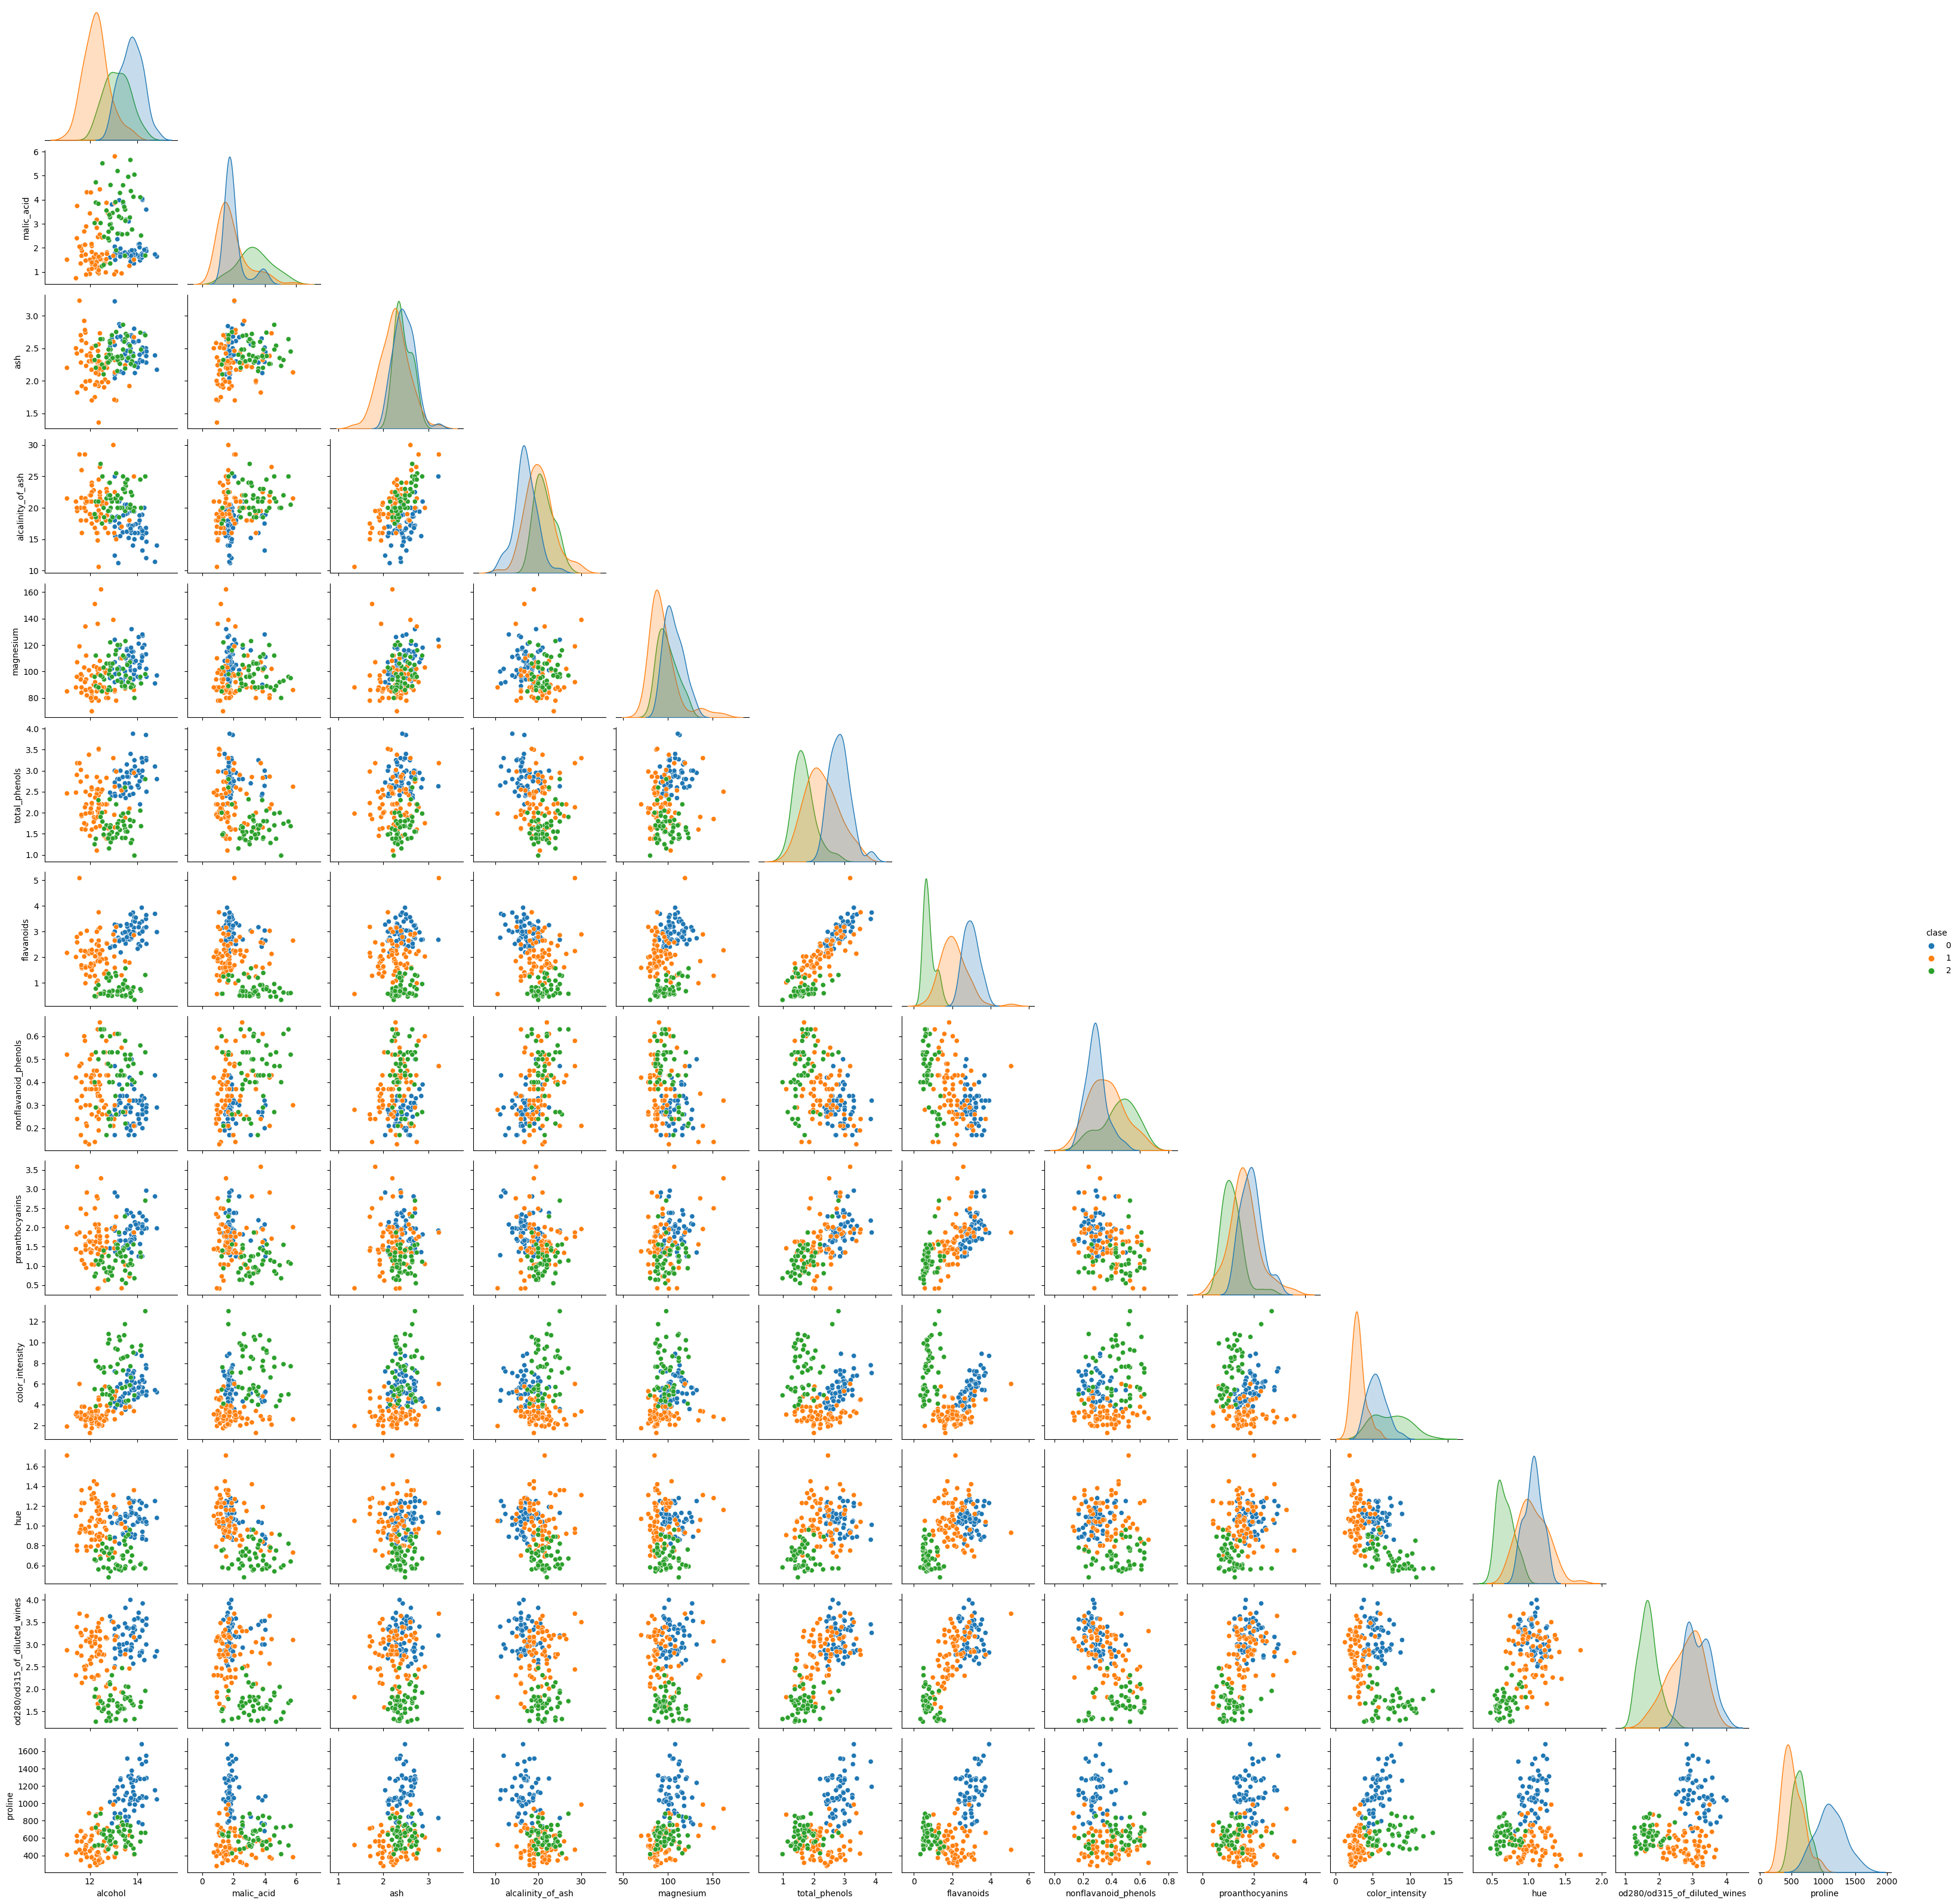

In [18]:
sns.pairplot(df,hue="clase",palette=sns.color_palette(n_colors=3),corner=True)

Definimos y entrenamos el SOM

In [19]:
# 3 clusters
som = MiniSom(1, 3, X.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

In [20]:
som.train_batch(X, 500, verbose=True)  # 500 epochs

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 3.522542936978591


In [21]:
winner_coordinates = np.array([som.winner(x) for x in X])
cluster_index = np.ravel_multi_index(winner_coordinates.T, (1,3))

Visualizamos los clusters generados y sus centroides

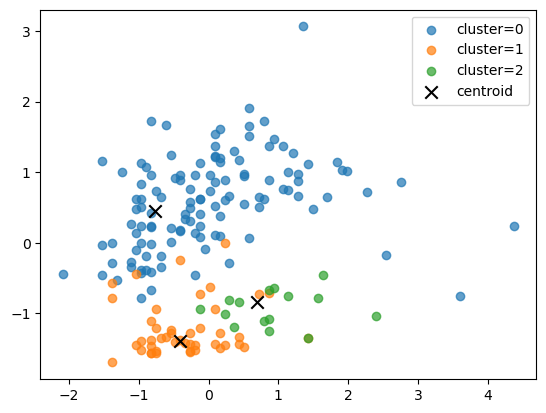

In [22]:
for c in np.unique(cluster_index):
    ## Cherry pick cuales features imprimir
    plt.scatter(X[cluster_index == c, 4],
                X[cluster_index == c, 6], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 4], centroid[:, 6], marker='x',
                s=80, color='k', label='centroid')
plt.legend();

## Mapas bidimensionales

Ahora analizaremos SOMs en dos dimensiones para análisis de variables.



In [23]:
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, X.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(X)
som.train(X, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.453827073480374


# U-map

El u-map muestra en colores la distancia entre los vectores de pesos de cada una de las neuronas. Por lo que prodemos encontrar fronteras entre clases.

Tambien agregamos infomación de los datos reales caul es su neurona ganadora en el SOM.

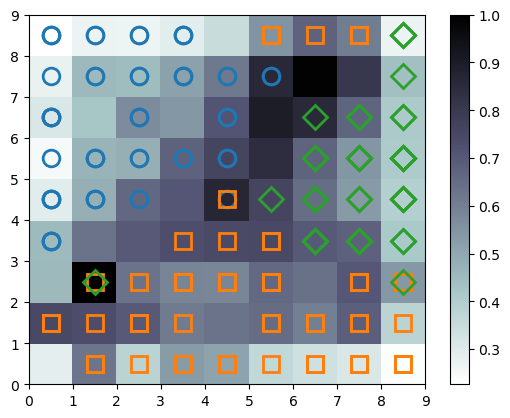

In [24]:
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X):
    w = som.winner(xx)
    plt.plot(w[0]+.5, w[1]+.5, markers[data.target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[data.target[cnt]], markersize=12, markeredgewidth=2)

plt.show()

Una alternativa es mostrar cuantos elementos de una clase quedaron cercanos a dada neurona.

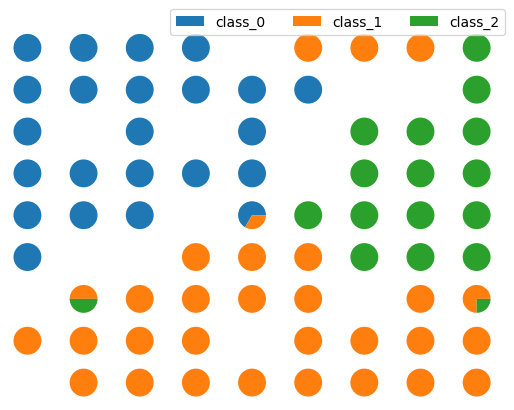

In [25]:
labels_map = som.labels_map(X, [data.target_names[t] for t in data.target])

fig = plt.figure()
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in data.target_names]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, data.target_names, bbox_to_anchor=(1.5, 3), ncol=3)

Tambien podemos ver las neuronas mas activas. Es decir, las que resultan mas cercanas a mas datos.

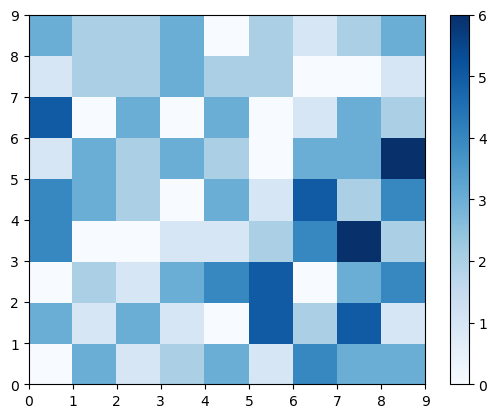

In [26]:
# Solo muestra las neruonas más activas no las clases
frequencies = som.activation_response(X)
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar()
plt.show()

Tambien podemos ver el nivel de actibación por cada una de las caracteristicas. Esto nos ayuda a encontrar correlaciones entre variables y cuales nos ayudan mas a identificar cierta clase.

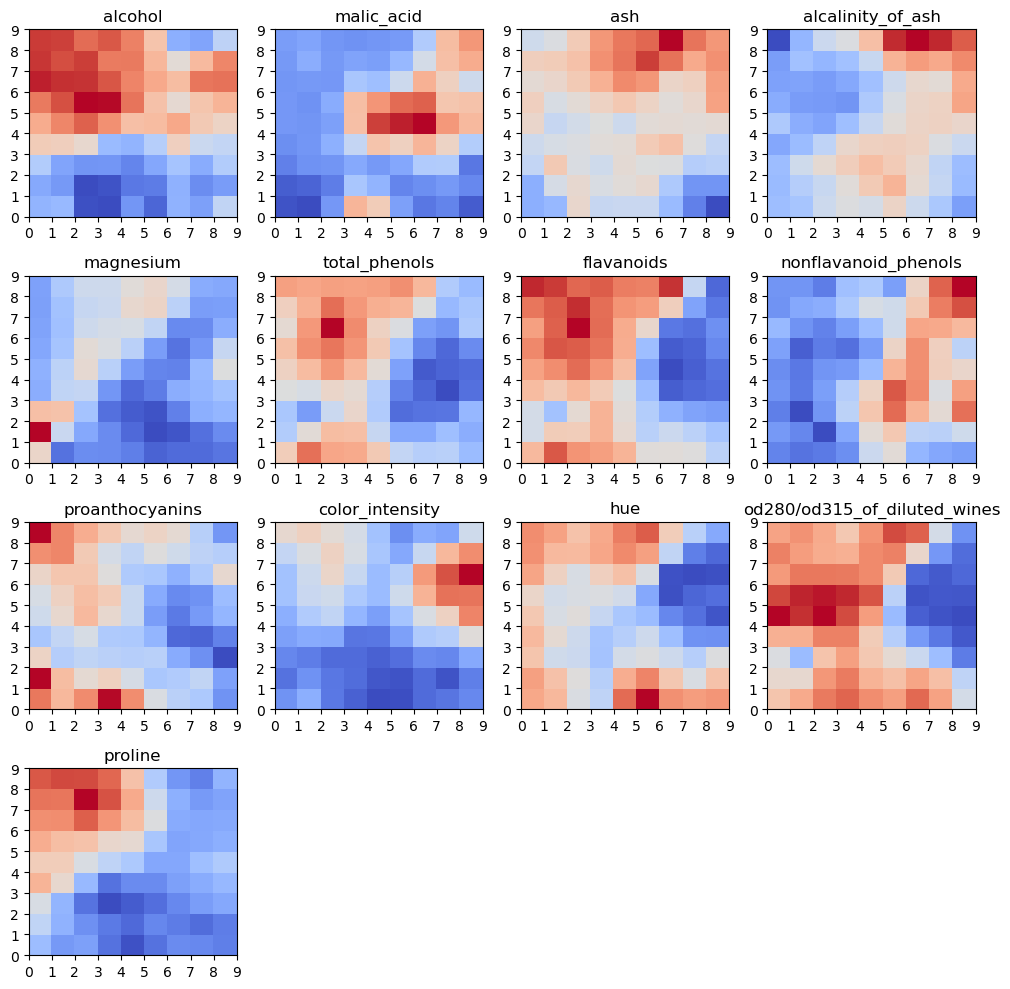

In [27]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(data.feature_names):
    plt.subplot(4,4, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(9+1))
    plt.yticks(np.arange(9+1))
plt.tight_layout()
plt.show()

Finalmente, podemos medir el desempeño de un SOM a traves de


1. **Error de Cuantización ( Quantization Error ):**

   El Error de Cuantización es una métrica que mide cuánto se "ajustan" las neuronas de la red a los datos de entrada. Se calcula como la distancia entre el vector de entrada y el vector de peso de la neurona ganadora (la neurona cuyo vector de peso es más cercano al vector de entrada) para cada ejemplo en el conjunto de datos. Luego, se promedian todas estas distancias para obtener el Error de Cuantización promedio.

   Un QE bajo significa que las neuronas están representando efectivamente los datos de entrada, lo que indica una buena calidad de la representación del SOM.

2. **Error Topográfico  ( Topographic Error ):**

   El Error Topográfico, evalúa si las neuronas que están geográficamente cerca en el SOM representan también datos similares en el espacio de entrada. El TE se calcula contando la proporción de pares de neuronas vecinas en el SOM que no son vecinas en el espacio de entrada. En otras palabras, mide cuántas veces las neuronas vecinas en el SOM no son vecinas en el espacio de entrada real.

   Un TE bajo indica que la topología de los datos en el espacio de entrada se preserva bien en el mapa SOM, lo que significa que las neuronas cercanas en el mapa representan datos similares en el espacio de entrada.

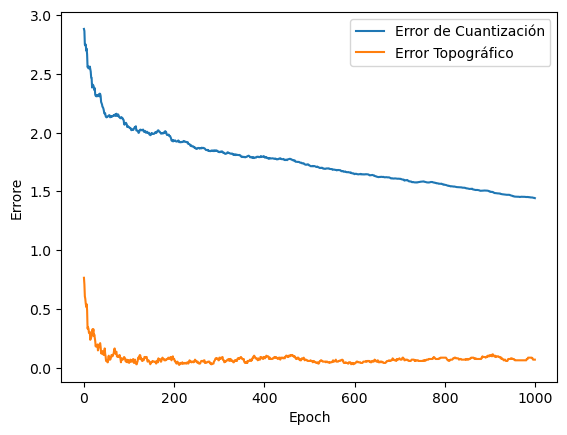

In [28]:
som = MiniSom(n_neurons, m_neurons, X.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X))
    som.update(X[rand_i], som.winner(X[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X))
    t_error.append(som.topographic_error(X))

plt.plot(np.arange(max_iter), q_error, label='Error de Cuantización')
plt.plot(np.arange(max_iter), t_error, label='Error Topográfico')
plt.ylabel('Errore')
plt.xlabel('Epoch')
plt.legend()
plt.show()